## **Decision Trees**

* Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression tasks. So called Classification and Regression Trees(CART)

* The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

* Advantages
    * Easy to understand and interpret
    * Can handle both numerical and categorical data
    * Requires little data preparation

* Disadvantages
    * Can overfit the data
    * Sensitive to noisy data
    * Can be biased with imbalanced datasets

### **Components of Decision Trees**
* Root Node: The topmost node that represents the entire dataset.

* Decision Node: Nodes that split into branches.

* Leaf Node: Terminal nodes that predict the outcome.

* Branches: Paths connecting nodes representing decisions or outcomes.

### **Splitting Criteria**

* Methods to decide how to split a node into branches
    * Gini Impurity
        * Measures the likelihood of an incorrect classification.
    * Entropy
        * Measures the randomness or uncertainty in the data.  
    * Information Gain
        * Reduction in entropy after a dataset is split.


### **Stopping Criteria**
* Maximum depth of the tree

* Minimum number of samples required to split a node

**Decision tree for Classification**

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}


df = pd.DataFrame(data)
df.head()

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes


In [6]:
# Encode categorical variables
# We are using label encoding for Outlook, Temperature, Humidity
le_outlook = LabelEncoder()
le_temperature = LabelEncoder()
le_humidity = LabelEncoder()
le_playtennis = LabelEncoder()

df['Outlook'] = le_outlook.fit_transform(df['Outlook'])
df['Temperature'] = le_temperature.fit_transform(df['Temperature'])
df['Humidity'] = le_humidity.fit_transform(df['Humidity'])
df['Windy'] = df['Windy'].astype(int)
df['PlayTennis'] = le_playtennis.fit_transform(df['PlayTennis'])   

In [7]:
df.head()

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [8]:
# Separate features and target variable
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Create Decision Tree classifier
clf = DecisionTreeClassifier()

# Train Decision Tree classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.6


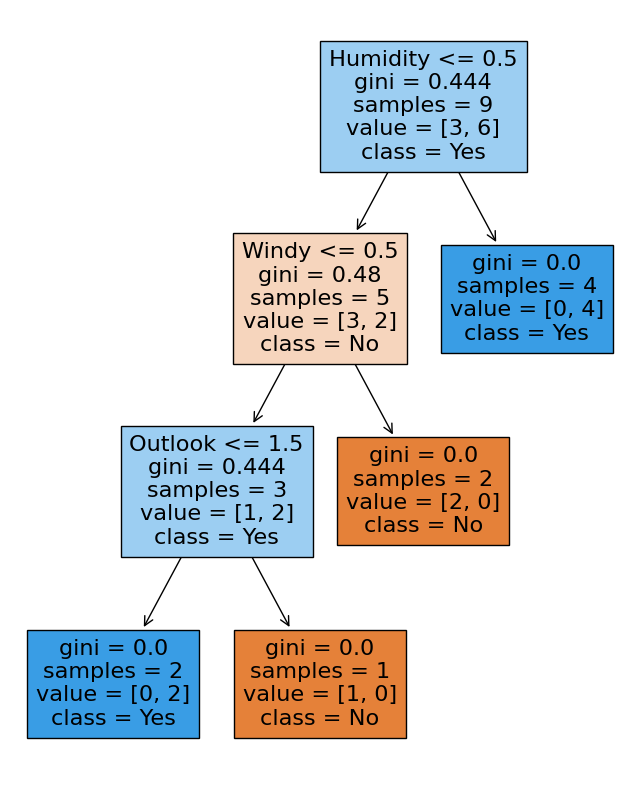

In [16]:
plt.figure(figsize=(8,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

**DecisionTree for Classification using Iris Dataset**
* The Iris dataset consists of 150 samples of iris flowers from three different species: Setosa, Versicolor, and Virginica. 

* Each sample includes four features: sepal length, sepal width, petal length, and petal width.

In [19]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifier
clf = DecisionTreeClassifier()

# Train Decision Tree classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


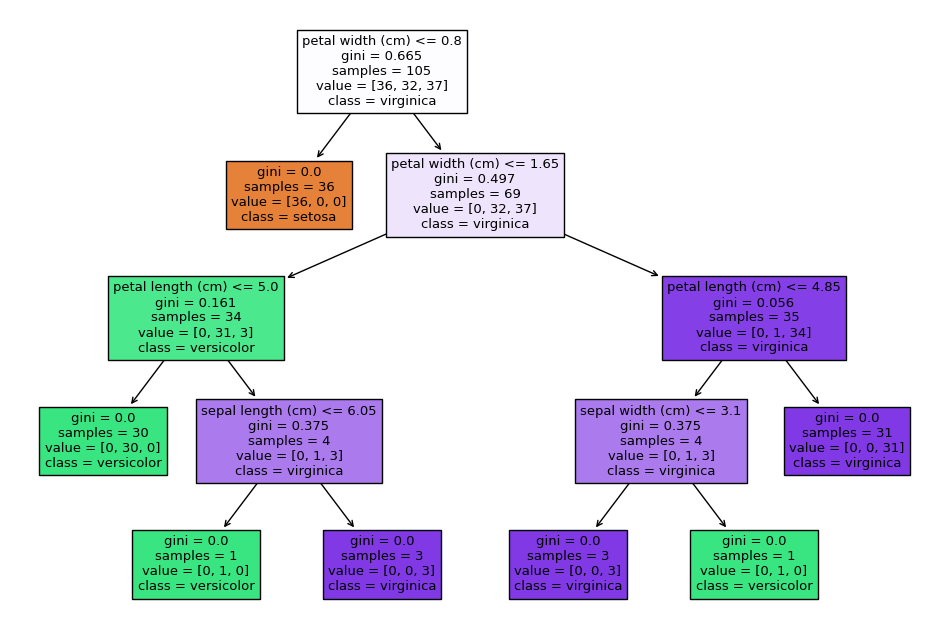

In [20]:
# Visualizing the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

**DecisionTree for Regression using California Housing Dataset**

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [27]:
# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Mean Absolute Error (MAE): 0.5978280732432433
Mean Squared Error (MSE): 0.6424109810265641
Root Mean Squared Error (RMSE): 0.8015054466605727
R^2 Score: 0.5097629887358219


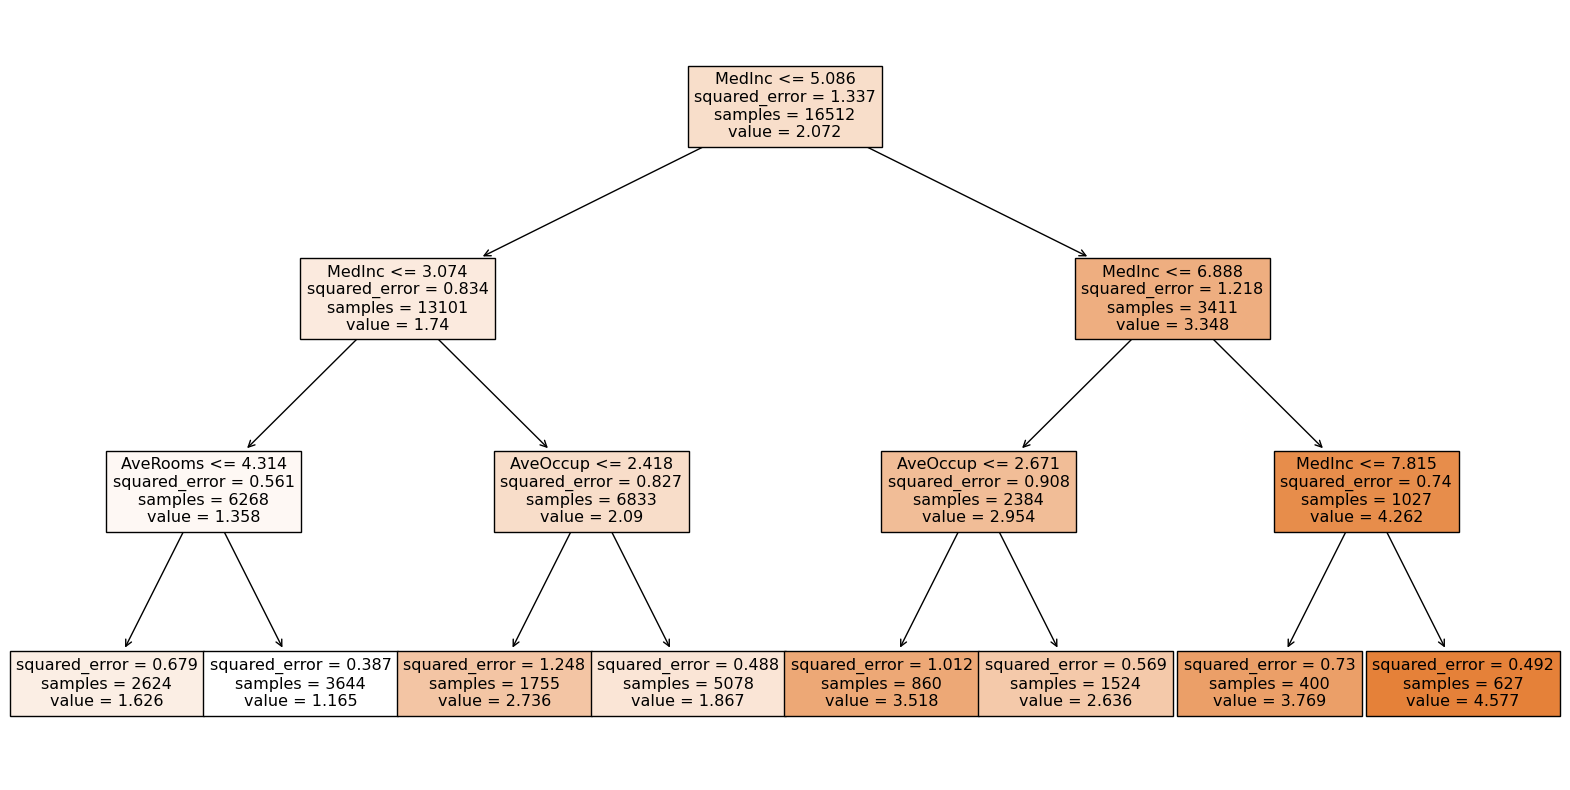

In [28]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree regressor
regressor = DecisionTreeRegressor(max_depth=3)

# Train Decision Tree regressor
regressor = regressor.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = regressor.predict(X_test)

# Model evaluation
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score:", metrics.r2_score(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=california.feature_names)
plt.show()  


### **Overfitting in Decision Trees**

* Decision trees are prone to overfitting.

*  A decision tree can easily become overfit due to its inherent nature of recursively partitioning the feature space.

* Techniques to handle overfitting
    * Pruning Techniques
        * It involves growing the tree to its maximum depth and then iteratively removing unnecessary branches.
        * Two standard pruning techniques are pre-pruning and post-pruning. 
        * Pre-pruning sets a threshold for tree growth, such as a maximum depth or a minimum number of samples per leaf. 
        * Post-pruning involves growing the tree and subsequently removing branches that do not significantly improve performance on a validation set.

    * Feature Selection and Engineering
        * Feature selection techniques, such as information gain or feature importance measures, can help identify the most informative features.   

    * Ensemble Methods
        * Ensemble methods, like random forests and gradient boosting, can effectively mitigate overfitting.

    * Increasing Training Data

**Decision Trees Algorithms**
* ID3 (Iterative Dichotomiser 3)
* C4.5
* C5.0
* CART (sklearn usese CART)